# 서울시 구별 CCTV 현황 분석

## 데이터 수집
+ https://opengov.seoul.go.kr
    - 구글에서 "서울시 cctv현황" 검색을 통해 데이터 수집
    - cctv.csv
+ https://data.seoul.go.kr/
    - 구글에서 "서울시 인구" 검색을 통해 데이터 수집

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() #한글이 깨지지않고 나오도록
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# CCTV 자료 불러오기
cctv_seoul = pd.read_csv("C:/Users/user/Documents/jun/analysis/서울/cctv.csv")
cctv_seoul.head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [7]:
# 인구수 자료 불러오기
pop_seoul= pd.read_excel("C:/Users/user/Documents/jun/analysis/서울/Report.xls",usecols="B,D,G,J,N",
                        header=2)
pop_seoul

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


# 2. 탐색적 데이터 분석(EDA)과 전처리

## 2-1. 컬럼 이름 변경

In [11]:
# CCTV 자료에서 기관명이라는 컬럼을 "구별"로 변경
cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"},inplace=True)
cctv_seoul

# 인구수 자료에서 컬럼명을 각각 구별, 인구수. 한국인, 외국인, 고령자로 변경
pop_seoul.rename(columns={pop_seoul.columns[0]:"구별",
                         pop_seoul.columns[1]:"인구수",
                         pop_seoul.columns[2]:"한국인",
                         pop_seoul.columns[3]:"외국인",
                         pop_seoul.columns[4]:"고령자"},inplace=True)
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470
6,동대문구,364962,349308,15654,56284
7,중랑구,411552,406868,4684,59992
8,성북구,453902,442226,11676,66896
9,강북구,327511,323862,3649,57002


## 2-2 어느 구가 가장 CCTV가 많이 설치되었는가?(가장 적은 곳은 어디인가?)

In [13]:
# CCTV 데이터에서 소계를 기준으로 정렬
cctv_seoul.sort_values(by="소계",ascending=False).head()
cctv_seoul.sort_values(by="소계",ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [17]:

###((2014 +2015+ 2016)/ 2013년도 이전)*100
cctv_seoul["최근증가율"] = (cctv_seoul["2016년"]+cctv_seoul["2015년"]+ \
                      cctv_seoul["2014년"])/cctv_seoul["2013년도 이전"]*100
cctv_seoul.head()

cctv_seoul.sort_values(by="최근증가율",ascending=False).head()
cctv_seoul.sort_values(by="최근증가율",ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
18,양천구,2482,1843,142,30,467,34.671731
13,서대문구,1254,844,50,68,292,48.578199
20,용산구,2096,1368,218,112,398,53.216374
5,광진구,878,573,78,53,174,53.228621
14,서초구,2297,1406,157,336,398,63.371266


## 2-3. 어느 구가 가장 인구수가 많은가?

In [18]:
# 필요없는 행 삭제(서울시 전체 합계 삭제) : del, drop
pop_seoul.drop([0],inplace=True)
pop_seoul.head()


,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [21]:
# 구별 데이터의 중복이나 결측치 등을 확인
pop_seoul["구별"].unique()
pop_seoul[pop_seoul["구별"].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [22]:
# 결측치 데이터 삭제
pop_seoul.drop([26],inplace=True)

In [23]:
pop_seoul["구별"].unique()
pop_seoul[pop_seoul["구별"].isnull()]

,구별,인구수,한국인,외국인,고령자


In [30]:
# 인구수 확인
pop_seoul.sort_values(by="인구수",ascending=True).head()
pop_seoul.sort_values(by="인구수",ascending=False).head()

pop_seoul.sort_values(by="외국인",ascending=True).head()
pop_seoul.sort_values(by="외국인",ascending=False).head()

pop_seoul.sort_values(by="고령자",ascending=True).head()
pop_seoul.sort_values(by="고령자",ascending=False).head()

,구별,인구수,한국인,외국인,고령자
24,송파구,671994,665282,6712,77978
16,강서구,608361,601696,6665,77381
12,은평구,490253,485902,4351,75535
11,노원구,555803,551902,3901,75081
21,관악구,522292,504445,17847,70807


In [31]:
# 외국인비율, 고령자비율 컬럼 추가해서 순위 확인
pop_seoul["외국인비율"]= pop_seoul["외국인"]/ pop_seoul["인구수"] *100
pop_seoul["고령자비율"]= pop_seoul["고령자"]/ pop_seoul["인구수"] *100

In [33]:
pop_seoul.sort_values(by="외국인비율",ascending=True).head()
pop_seoul.sort_values(by="외국인비율",ascending=False).head()

pop_seoul.sort_values(by="고령자비율",ascending=True).head()
pop_seoul.sort_values(by="고령자비율",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,327511,323862,3649,57002,1.114161,17.404606
1,종로구,164348,154549,9799,26429,5.962348,16.081121
2,중구,135139,126082,9057,21655,6.701988,16.024242
10,도봉구,345041,342861,2180,54293,0.631809,15.735231
6,동대문구,364962,349308,15654,56284,4.289214,15.421880


## 2-4. 인구대비 CCTV 설치 현황을 알아보자

In [34]:
# CCTV 데이터와 인구수 데이터를 합치기
data_result = pd.merge(cctv_seoul, pop_seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [35]:
# 필요없는 컬럼 제거 : 2013년도 이전, 2014, 2015, 2016년
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]


In [36]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [37]:
# 구별 컬럼을 인덱스로 변경
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [39]:
# CCTV의 갯수(소계)와 인구 데이터 중 어느 변수와 관계가 있는지를 확인
# np.corrcoef() : 상관 계쑤 -1 ~ 1


print(np.corrcoef(data_result["고령자비율"], data_result["소계"]))
print(np.corrcoef(data_result["외국인비율"], data_result["소계"]))
print(np.corrcoef(data_result["인구수"], data_result["소계"]))

[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


In [40]:
data_result.sort_values(by="소계",ascending=False).head()
data_result.sort_values(by="인구수",ascending=False).head()


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
노원구,1566,188.929889,555803,551902,3901,75081,0.701867,13.508563
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current

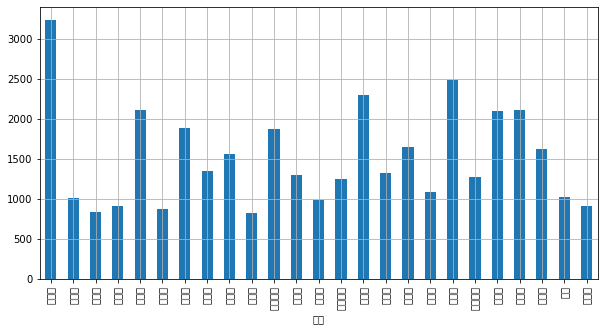

In [44]:
# CCTV가 많이 설치된 구별로 그래프 그리기
data_result["소계"].plot(kind="bar")
data_result["소계"].plot.bar()
data_result["소계"].plot(kind="bar",figsize=(10,5),grid=True)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current

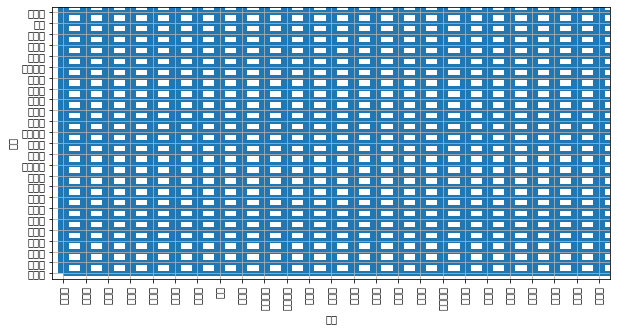

In [46]:
data_result["소계"].plot(kind="barh",figsize=(10,5),grid=True)
data_result["소계"].sort_values().plot(kind="bar",figsize=(10,5),grid=True)

In [47]:
# CCTV비율 컬럼 추가(소계/인구수 * 100)
data_result["cctv비율"]=data_result["소계"]/ data_result["인구수"]*100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,0.253732
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,0.403797


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current

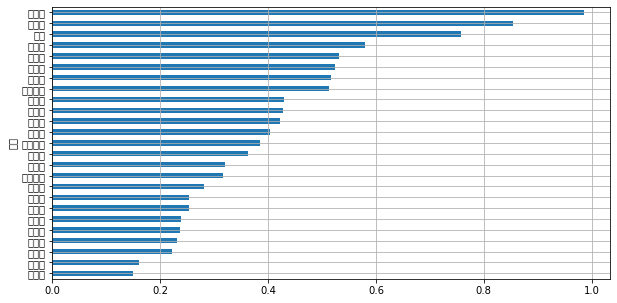

In [48]:
data_result["cctv비율"].sort_values().plot(kind="barh",figsize=(10,5),grid=True)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


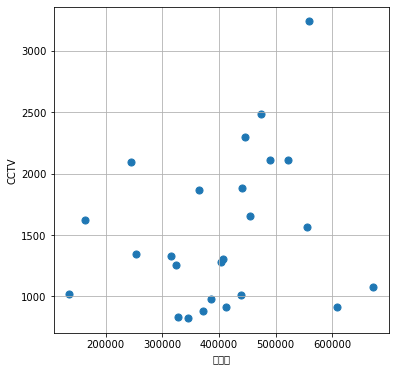

In [49]:
# CCTV의 설치 대수와 인구수의 관계를 산포도로 확인

plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"], data_result["소계"],s=50)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

In [55]:
# poly1d(1차방정식을 만들어주는 함수 numpy소속)
a=np.poly1d([1,2])
a

b=np.poly1d([1,2,3])
print(b)

x=np.array([1,2,3,4,5,6,7,8,9])
y=np.array([2,3,3,5,6,7,7,10,11])
c=np.polyfit(x,y,1)
print(c)

d=np.poly1d(c)
print(d)

   2
1 x + 2 x + 3
[1.11666667 0.41666667]
 
1.117 x + 0.4167


[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current fon

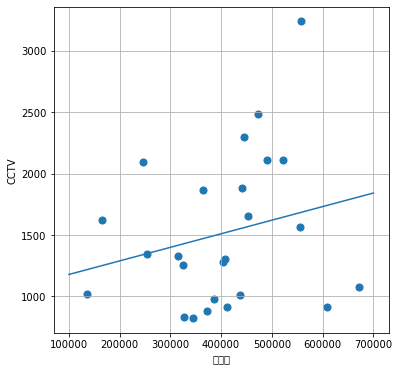

In [58]:
# 회귀선 작성(y=ax+b)
fp1=np.polyfit(data_result["인구수"],data_result["소계"],1)
print(fp1)

f1 = np.poly1d(fp1)
print(f1)

fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"],data_result["소계"],s=50)
plt.plot(fx,f1(fx))
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


TypeError: 'numpy.ndarray' object is not callable

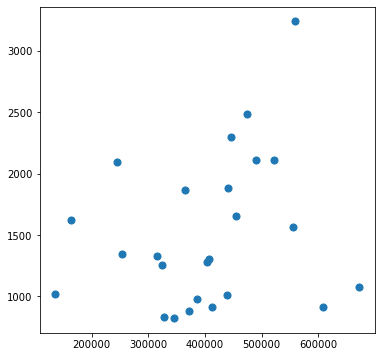

In [61]:
# 회귀선 작성(y = ax + b)

fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
print(fp1)

f1 = np.poly1d(fp1)
print(f1)

fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
#plt.plot(fx, fp1[0]fx + fp1[1], lw=3, color='g', ls='dashed')
plt.plot(fx, fp1(fx), lw=3, color='g', ls='dashed')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()




In [62]:
# 각 데이터의 오차를 구해서 구 이름을 출력
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475,542.582309
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,0.253732,599.318223
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,0.403797,463.580517


In [63]:
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790
송파구,1081,104.347826,671994,665282,6712,77978,0.998818,11.603973,0.160865,729.738939
도봉구,825,246.638655,345041,342861,2180,54293,0.631809,15.735231,0.239102,624.677016
중랑구,916,79.960707,411552,406868,4684,59992,1.138131,14.577016,0.222572,607.126685
광진구,878,53.228621,371671,357149,14522,44470,3.907219,11.964883,0.236230,601.085154


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current

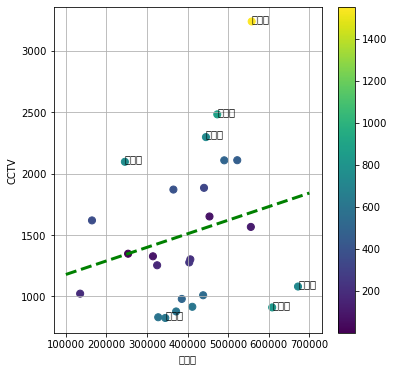

In [66]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50,
           c = data_result['오차'])
plt.plot(fx, f1(fx), lw=3, color='g', ls='dashed')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.colorbar()

for n in range(7):
    plt.text(df_sort["인구수"][n], df_sort["소계"][n],df_sort.index[n],
            fontsize=10)

In [67]:
# 최종 결과물을 파일로 저장
df_sort.to_csv("C:/Users/user/Documents/jun/analysis/서울/cctv_result.csv",sep=",",encoding="utf-8")